In [10]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [16.0, 8.0]
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import math

df = pd.read_csv('../assets/run.csv')
df.head()

,position_lat,position_long,timestamp,Power,heart_rate,enhanced_altitude
0,NaN,NaN,2019-08-21 03:24:16,201.0,119.0,294.0
1,504612085.0,-999397826.0,2019-08-21 03:24:17,210.0,120.0,308.0
2,504614191.0,-999397963.0,2019-08-21 03:24:18,216.0,122.0,314.4
3,504614830.0,-999398356.0,2019-08-21 03:24:19,231.0,122.0,319.2
4,504614846.0,-999398479.0,2019-08-21 03:24:20,231.0,121.0,312.2


In [14]:
# Data preprocessing
df['position_lat_degrees'] = df['position_lat'] * (180 / 2**31)
df['position_long_degrees'] = df['position_long'] * (180 / 2**31)

def lat2y(a):
    return 180.0/math.pi*math.log(math.tan(math.pi/4.0+a*(math.pi/180.0)/2.0))
df['position_lat_degrees_mercantor'] = df['position_lat_degrees'].apply(lat2y)

df = df.dropna()
df.head()

,position_lat,position_long,timestamp,Power,heart_rate,enhanced_altitude,position_lat_degrees,position_long_degrees,position_lat_degrees_mercantor
1,504612085.0,-999397826.0,2019-08-21 03:24:17,210.0,120.0,308.0,42.296096,-83.768558,46.761236
2,504614191.0,-999397963.0,2019-08-21 03:24:18,216.0,122.0,314.4,42.296273,-83.768570,46.761474
3,504614830.0,-999398356.0,2019-08-21 03:24:19,231.0,122.0,319.2,42.296326,-83.768602,46.761547
4,504614846.0,-999398479.0,2019-08-21 03:24:20,231.0,121.0,312.2,42.296328,-83.768613,46.761549
5,504615114.0,-999398697.0,2019-08-21 03:24:21,234.0,120.0,309.6,42.296350,-83.768631,46.761579


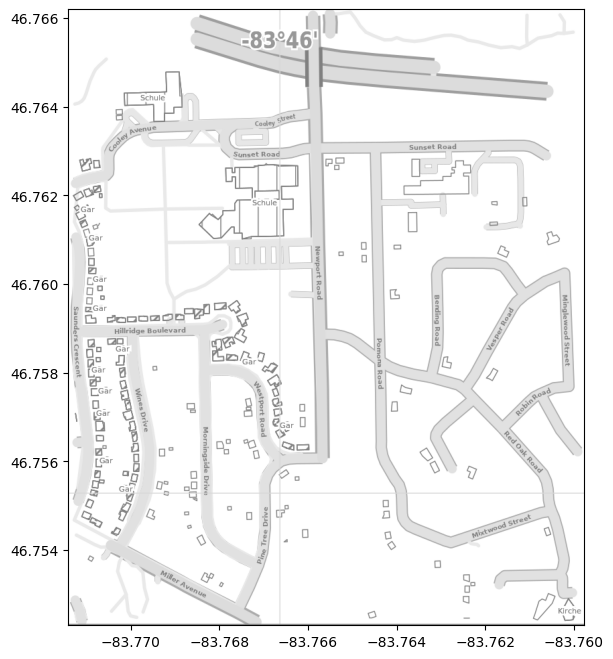

In [15]:
# First approach is the most simple. The gist is that we will render an image
# behind an Axes object, then just use our regular plotting on the Axes object. For this to work it means we
# need an image and we need to know the coordinates of the image bounds. Then we can set the 'extent' which
# represents the bounds of the map. This means our image behind the Axes object will be using the same coordinatee system
# as the Axes object itself, and the plot will be locked.

image = plt.imread("../assets/map.png")
plt.imshow(image, alpha=0.5, extent=[-83.77141, -83.75977, 46.75230, 46.76620])


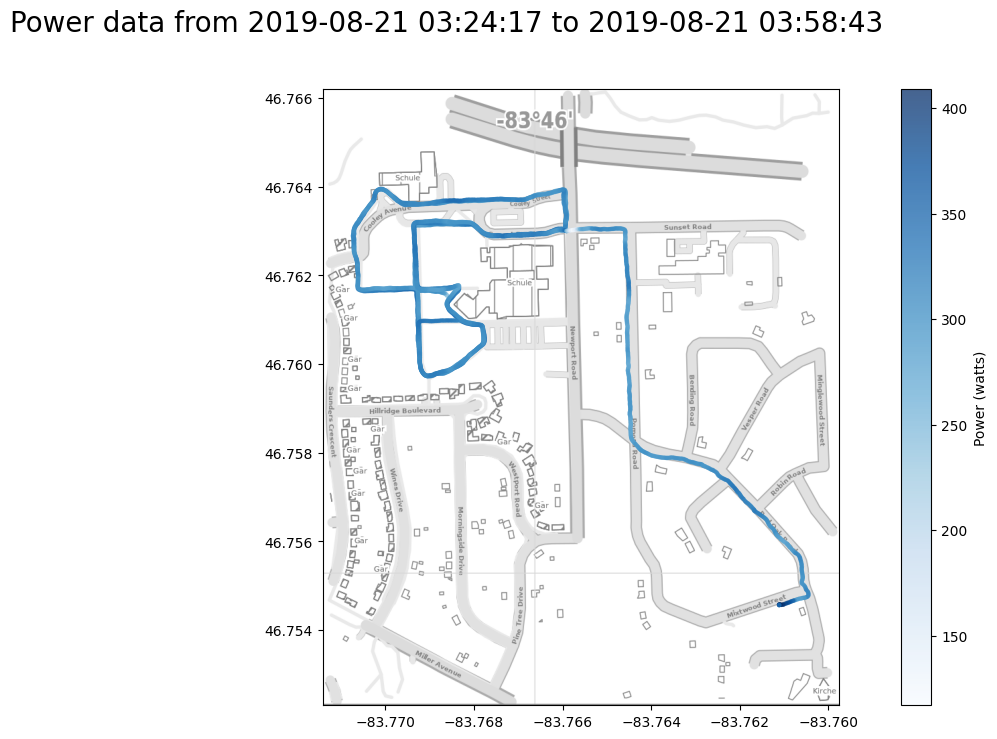

In [16]:
# Now it's really easy to overlay our data on top of this spot, we just use whatever plotting
# function which exists in pyplot that we are interested in! In this case we're going to use scatter().
# We're going to add a color bar as well, and change the values of the dots being plotted based on the power column in our data

# Reshow the image, because we didn't turn off image closing in jupyter
plt.imshow(image, alpha=0.5, extent=[-83.77141, -83.75977, 46.75230, 46.76620])

plt.scatter(df['position_long_degrees'], df['position_lat_degrees_mercantor'],
s=5, c=df['Power'], cmap='Blues', alpha=0.75)

# Nowe we get pyplot to render a colorbar so we know the meeting of the colors
plt.colorbar().set_label('Power (watts)')

plt.suptitle('Power data from {} to {}'.format(np.min(df['timestamp']), np.max(df['timestamp'])), size='20');


In [ ]:
from mpl.backend_tools